# LE1 - Eigenwerte und Eigenvektoren mit Python


### Beispiel mit Sympy

In [2]:
import sympy as sp

In [3]:
#Matrix A erstellen
A = sp.Matrix([[2,0,0],[1,2,3], [1,0,5]])
A

Matrix([
[2, 0, 0],
[1, 2, 3],
[1, 0, 5]])

In [4]:
#Eigenwerte auslesen
A.eigenvals()

{2: 2, 5: 1}

Sympy gibt zusätzlich zu den Eigenwerten auch die Algebraische Vielfachheit aus.
2 hat eine Algebraische Vielfachheit von 2 und 5 hat die Algebraische Vielfachheit von 1


Weitere Beispiele

In [5]:
#Eigenvektoren
A.eigenvects()

[(2,
  2,
  [Matrix([
   [0],
   [1],
   [0]]),
   Matrix([
   [-3],
   [ 0],
   [ 1]])]),
 (5,
  1,
  [Matrix([
   [0],
   [1],
   [1]])])]

Für 2 gibt es 2 Eigenvektoren [0,1,0], [-3,0,1] und für 5 gibt es einen Eigenvektor [0,1,1]

In [6]:
#Diagonalisierung
V,D = A.diagonalize()
V

Matrix([
[0, -3, 0],
[1,  0, 1],
[0,  1, 1]])

In [7]:
D

Matrix([
[2, 0, 0],
[0, 2, 0],
[0, 0, 5]])

Gibt Matrix V mit den Eigenvektoren und Matrix D mit den Eigenwerten auf der Diagonale angeordnet

In [8]:
#Diagonalisierbarkeit prüfen mithilfe der Inverse
V_inv = V.inv()
V_inv

Matrix([
[-1/3, 1, -1],
[-1/3, 0,  0],
[ 1/3, 0,  1]])

In [9]:
#Matrix D erstellen (@ dient als Produktzeichen in Sympy)
V_inv@A@V

Matrix([
[2, 0, 0],
[0, 2, 0],
[0, 0, 5]])

## Beispiel mit Numpy


In [10]:
import numpy as np
from matplotlib import pyplot as plt


In [11]:
#Matrix A erstellen
A = np.array([[2,0,0],[1,2,3],[1,0,5]])
A

array([[2, 0, 0],
       [1, 2, 3],
       [1, 0, 5]])

In [12]:
eVal, eVec = np.linalg.eig(A)

In [13]:
#Eigenwerte auslesen
eVal

array([2., 5., 2.])

In [14]:
#Eigenvektoren auslesen
eVec

array([[ 0.        ,  0.        ,  0.94208241],
       [ 1.        ,  0.70710678, -0.1177603 ],
       [ 0.        ,  0.70710678, -0.31402747]])

## Übungen aus LE1

### Aufgabe 15

<img src="https://raw.githubusercontent.com/ChristianHeeb/ala/main/Bilder/Aufgabe15.jpg"  width="1000">

#### (a) Berechnen Sie die Eigenvektoren und Eigenwerte von A und geben Sie sie aus.

In [15]:
A = np.array([[89,75,22,102],[75,116,27,120],[22,27,33,62],[102,120,62,200]])
A

array([[ 89,  75,  22, 102],
       [ 75, 116,  27, 120],
       [ 22,  27,  33,  62],
       [102, 120,  62, 200]])

In [16]:
# Eigenwerte
ew, ev = np.linalg.eig(A)

In [17]:
ew

array([361.75382302,  42.74593101,  26.33718907,   7.16305691])

In [18]:
ev

array([[-0.42552429, -0.42476765,  0.76464379, -0.23199439],
       [-0.50507589, -0.54267519, -0.64193252, -0.19576676],
       [-0.20612674,  0.54869183, -0.05515612, -0.80833585],
       [-0.72203822,  0.4733005 ,  0.01415338,  0.50442752]])

#### (b) Zeigen Sie, dass die einzelnen Eigenvektoren orthogonal zueinander sind. Warum ist das so?

In [19]:
np.round(np.dot(ev.T, ev ), 10)

array([[ 1.,  0., -0., -0.],
       [ 0.,  1.,  0., -0.],
       [-0.,  0.,  1., -0.],
       [-0., -0., -0.,  1.]])

Die Eigenvektoren stehen orthogonal zueinander, weil die Matrix A symmetrisch ist

#### (c) Erstellen Sie eine Matrix V aus den Eigenvektoren von A und diagonalisieren Sie damit die Matrix A.

In [20]:
V = ev
Vinv = np.linalg.inv(V)
D = np.round( Vinv.dot(A).dot(V), decimals = 4)
D

array([[361.7538,   0.    ,  -0.    ,   0.    ],
       [  0.    ,  42.7459,   0.    ,   0.    ],
       [  0.    ,  -0.    ,  26.3372,  -0.    ],
       [  0.    ,   0.    ,  -0.    ,   7.1631]])

#### (d) Berechnen Sie A20 1) indem Sie die Matrix 20x mit sich selbst multiplizieren und 2) indem Sie die bereits berechnete Diagonalmatrix D und die Matrizen V und V−1 benutzen. Welche Methode ist schneller? Wie schneidet np.linalg.matrix_power() im Vergleich dazu ab?

In [21]:
import time

start = time.time()

res = np.eye( A.shape[0] )
for i in range(20):
    res = res.dot(A)

end = time.time()
print("time to compute [ms]:", ((end - start)/1000))

time to compute [ms]: 7.319450378417969e-08



### Aufgabe 16

<img src="https://raw.githubusercontent.com/ChristianHeeb/ala/main/Bilder/Aufgabe16.jpg"  width="1000">

#### (a) Speichern Sie die Messpunkte in einer Matrix X ∈ R2×20.

In [22]:
X = np.array([[-2, -4, -6 , 6, -8, 6, 3, 6, 8, -9, -1, 1, 4, 2, 2, 2, -1, -1, 2, 2],
              [-3, -7, -13, 16, -14, 14, 6, 11, 18, -19, 5, 0, 3, 3, 6, 8, -3, -1, 0, 9]])
X

array([[ -2,  -4,  -6,   6,  -8,   6,   3,   6,   8,  -9,  -1,   1,   4,
          2,   2,   2,  -1,  -1,   2,   2],
       [ -3,  -7, -13,  16, -14,  14,   6,  11,  18, -19,   5,   0,   3,
          3,   6,   8,  -3,  -1,   0,   9]])

#### (b) Stellen Sie die Messpunkte grafisch in einem zweidimensionalen Koordinatensystem dar. Sehen Sie einen Zusammenhang zwischen den Grössen x und  y ?


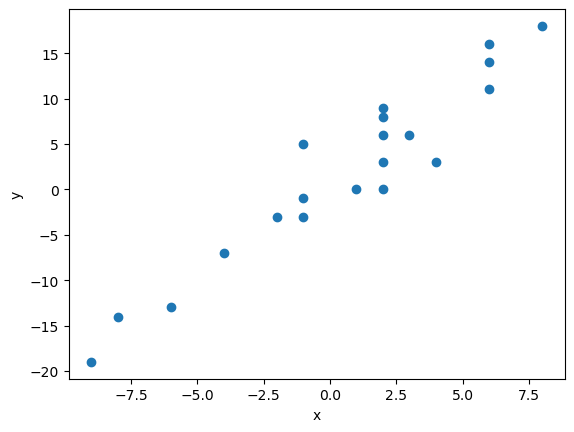

In [23]:
plt.scatter(X[0,:], X[1,:])
plt.xlabel("x")
plt.ylabel("y")

plt.show()


#### (c) Berechnen Sie mit Numpy die Eigenvektoren v1 und v2 der Matrix XXT. Welche Eigenschaft bringt XXT automatisch mit sich mit?

In [24]:
# Kreuzprodukt der zwei Matrizen X und X Transponierte (T) berechnen
XXT = np.dot(X, X.T)
sp.Matrix(XXT)

Matrix([
[422,  866],
[866, 1951]])

In [25]:
# Berechnung der Eigenwerte und Eigenvektoren
ew, ev = np.linalg.eig(XXT)

# Eigenwerte ausgeben
ew

array([  31.33064012, 2341.66935988])

In [26]:
# Eigenvektoren ausgeben
ev

array([[-0.91153928, -0.41121301],
       [ 0.41121301, -0.91153928]])

In [27]:
v1 = ev[:, 0]
v2 = ev[:, 1]

sp.Matrix(v1)

Matrix([
[-0.911539280492733],
[ 0.411213010639001]])

In [28]:
sp.Matrix(v2)

Matrix([
[-0.411213010639001],
[-0.911539280492733]])

#### (d) Überlegen Sie, wie Sie die Eigenvektoren aus (c) geeignet in die graphische Darstellung aus (b) integrieren können. In welche besonderen Richtungen zeigen die zwei Eigenvektoren?

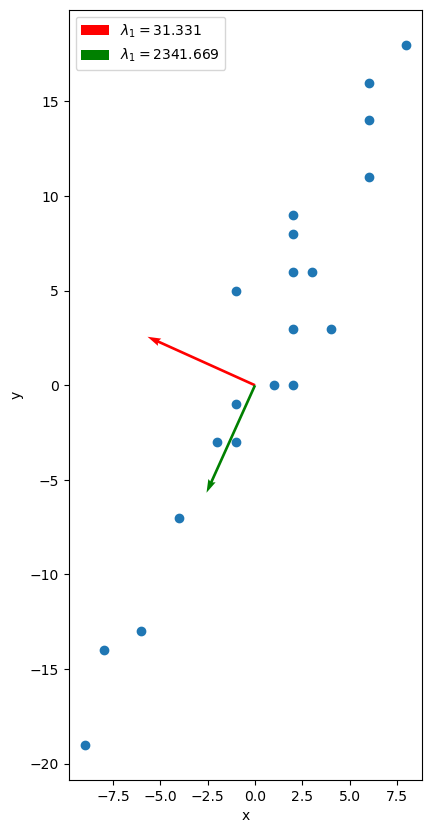

In [29]:
plt.figure(figsize=(7,10))
plt.scatter(X[0,:], X[1,:])
plt.xlabel("x")
plt.ylabel("y")
plt.quiver(0, 0, *v1, color="red", scale=3, label="$\lambda_1 = {:.3f}$".format(ew[0]))
plt.quiver(0, 0, *v2, color="green", scale=3, label="$\lambda_1 = {:.3f}$".format(ew[1]))
plt.legend()
plt.gca().set_aspect("equal")

# LE2 - Vertiefung lineare Abbildungen

## Übungen aus LE2

### Aufgabe 14

<img src="https://raw.githubusercontent.com/ChristianHeeb/ala/main/Bilder/2Aufgabe14.jpg" width="1000">

#### (b) Gegeben seien nun die zwei Matrizen A und B. Finden Sie eine geeignete Funktion in Python (Numpy  hat  leider  keine), die e^A^ und e^B^ berechnet. Berechnen Sie auch e^A+B^, e^A^e^B^ und e^B^e^A^ und prüfen Sie damit empirisch Ihre Schlussfolgerung aus (a).

In [30]:
from scipy.linalg import expm

A = np.array([[1,0],[1,-1]])
B = np.array([[2,-1],[-2,3]])

In [31]:
expm( A + B )

array([[ 28.06545077, -14.88394368],
       [-14.88394368,  13.1815071 ]])

In [32]:
expm( B + A )

array([[ 28.06545077, -14.88394368],
       [-14.88394368,  13.1815071 ]])

In [33]:
expm(A) @ expm(B)

array([[ 54.39709043, -47.00803433],
       [ 10.79393111,  -6.59940306]])

In [34]:
expm(B) @ expm(A)

array([[ 34.07399609,  -6.36184564],
       [-50.17535193,  13.72369128]])

Es gilt nicht $e^{A+B} = e^A \, e^B$.

#### (d) Prüfen Sie mit den Matrizen  A  und  B,  ob  der  Zusammenhang  det(e^A^)  =  e^spur(A)^  dafür  gilt.

In [35]:
np.linalg.det(expm(A))

1.0

In [36]:
np.exp(np.trace(A))

1.0

In [37]:
np.linalg.det(expm(B))

148.4131591025766

In [38]:
np.exp(np.trace(B))

148.4131591025766

### Aufgabe 17

<img src="https://raw.githubusercontent.com/ChristianHeeb/ala/main/Bilder/2Aufgabe17.jpg" width="1000">

In [39]:
def positiv_definit(A):
    eigvals = np.linalg.eigvals(A)
    return np.all(eigvals > 0)


A = np.array([[1, 2], [2, 1]])
positiv_definit(A)

False

In [40]:
B = np.array([[1, -1], [-1, 4]])
positiv_definit(B)

True

In [41]:
C = np.array([[1, 0, 0], [0, 1, 1], [0, 1, 1]])
positiv_definit(C)

False

In [42]:
D = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
positiv_definit(D)

True

# LE3 - Basistransformationen

## Übungen aus LE3

### Aufgabe 8

<img src="https://raw.githubusercontent.com/ChristianHeeb/ala/main/Bilder/3Aufgabe8.jpg" size = 1000>

#### (a) Erstellen  Sie  aus  diesen  Eigenvektoren  eine  Basistransformation  T  €  IR^2*2^,  die  in  die Eigenbasis von XX^T^ transformiert.

In [43]:
X = np.array([
    [-2, -4, -6, 6, -8, 6, 3, 6, 8, -9, -1, 1, 4, 2, 2, 2, -1, -1, 2, 2],
    [ -3, -7, -13, 16, -14, 14, 6, 11, 18, -19, 5, 0, 3, 3, 6, 8, -3, -1, 0, 9]
])

XXT = np.dot(X, X.T)
ew, ev = np.linalg.eig( XXT)

v1 = ev[:,0]
v2 = ev[:,1]

Eigenwerte nach Grösse sortieren

In [44]:
sorting = np.argsort(ew)[::-1]
v1 = ev[:,sorting][:,0]
v2 = ev[:,sorting][:,1]
lambda1 = ew[sorting][0]
lambda2 = ew[sorting][1]

Basistransformation:

In [45]:
T = ev[:,sorting]
T

array([[-0.41121301, -0.91153928],
       [-0.91153928,  0.41121301]])

$T^{-1}$ sollte $\mathbf{v}_1$ auf $\mathbf{e}_1$ und $\mathbf{v}_2$ auf $\mathbf{e}_2$ abbilden:

In [46]:
np.round( np.linalg.inv(T).dot(ev[:,sorting]),10 )

array([[ 1., -0.],
       [-0.,  1.]])

T ist übrigens orthogonal:


In [47]:
np.round( T.dot(T.T), 10 )

array([[ 1., -0.],
       [-0.,  1.]])

und damit gilt $T^{-1} = T^T$.

#### (b) Wenden Sie T nun auf die Messpunkte an und transformieren Sie sie so in die Eigenbasis von XX^T^. Stellen Sie die transformierten Messpunkte graphisch dar. Was stellen Sie fest?

Messpunkte mit $T^T$ in Eigenbasis transformieren:

In [48]:
X_EB = T.T.dot(X)

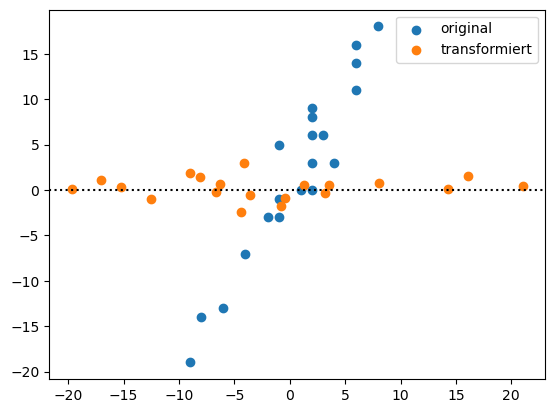

In [49]:
plt.scatter(X[0,:], X[1,:], label="original")
plt.scatter(X_EB[0,:], X_EB[1,:], label="transformiert")
plt.axhline(0, c="black", ls=":")
plt.legend()

Die Hauptvariationsachse ('1. Hauptkomponente') wurde auf die $x$-Achse gedreht!

#### (c) Genaugenommen müssen x und y vor der Bestimmung der Eigenvektoren noch standardisiert werden, indem der Mittelwert abgezogen und durch die Standardabweichung geteilt wird. Führen Sie diese Transformationen direkt auf X durch und untersuchen Sie den Unterschied in der graphischen Darstellung.

In [50]:
Xs = (X - np.mean(X, axis=1).reshape(-1,1)) / np.std(X, axis=1).reshape(-1,1)
Xs.shape

(2, 20)

# LE5 - Singulärwertzerlegung (SVD) mit Python

<img src = "https://raw.githubusercontent.com/ChristianHeeb/ala/main/Bilder/svd.jpg" />

In [ ]:
#Pakete installieren

#ImageOps zum Import und bearbeitung eines Bildes
from PIL import Image, ImageOps
import requests

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Bild importieren
url = "https://img.freepik.com/fotos-kostenlos/weitwinkelaufnahme-eines-einzelnen-baumes-der-unter-einem-bewoelkten-himmel-waehrend-eines-sonnenuntergangs-waechst-der-durch-gras-umgeben-wird_181624-22807.jpg"
img = Image.open(requests.get(url, stream=True).raw)

#Bild anzeigen
plt.imshow(img)

In [ ]:
#Bild in Graustufe umwandeln (bei einem Farbigen Bild wird die Daraus erstellte Matrix ev. zu komplex)
img = ImageOps.grayscale(img)
#Bild in Matrix umwandeln
img_matrix_data = np.asarray(img)

print(img_matrix_data.shape)

#Bild anzeigen
plt.imshow(img_matrix_data, cmap="gray")

In [ ]:
#SVD durchführen

#Matrix "img_matrix_data" aufsplitten in Matrizen: U, Sigma und V-Transponiert
U, S, V = np.linalg.svd(img_matrix_data)

#Singulärwerte ausgeben
print(S)

In [ ]:
#Bild erstellen welches aus den ersten 20 Singulärwerten besteht
#Dazu müssen die Werte zuerst wieder in eine Matrix zurückgeformt werden
data_20 = np.matrix(U[:, :20]) * np.diag(S[:20]) * np.matrix(V[:20, :])

#Bild ausgeben
plt.imshow(data_20, cmap="gray")

In [ ]:
#Bild aus 2 Singulärwerten erstellen

data_2 = np.matrix(U[:, :2]) * np.diag(S[:2]) * np.matrix(V[:2, :])

#Bild ausgeben
plt.imshow(data_2, cmap="gray")